This core component in this assignment is to construct a document retrieval system upon the
LSH framework. This assignment consists of three parts. Please write a python program to
complete the following components:
● Part I: Construct LSH Hash Tables for All News Articles
● Part II: Perform Nearest Neighbor Search for Query Dataset
● Part III: Investigate the Impact of the hash size (k). Plots the Search Quality in F1-score.

Part I: Construct LSH Hash Tables for All News Articles
(a) Load the dataset and construct a feature vector for each news article in the dataset. Please
report the number of articles, and the number of features (𝑛). [5 pts]

In [4]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import time

file = pd.read_csv(r"...bitvector_all.csv",header = None,index_col = 0,delimiter ='\t')
file.drop(file.columns[14927],axis=1,inplace=True) #remove last column which is not binary code
file_query = pd.read_csv(r"...bitvector_query.csv",header = None,index_col = 0,delimiter ='\t')
file_query.drop(file_query.columns[14927],axis=1,inplace=True)
# convert bitvector to nXm dimensional array
array_all = file.values.tolist()
array_query = file_query.values.tolist()
#range row 0 - 533, col 0-14926 
print("Total number of articles: ",str(len(file))) 
print("Total number of features: ",str(len(file.columns)))


Total number of articles:  534
Total number of features:  14927


(b) Construct a family of MinHash functions in the LSH family by taking a prime 𝑝 ≥ 𝑛 and for
0 < 𝑎 < 𝑝, 0 ≤ 𝑏 < 𝑝 with the number of tables (l=10) and a tunable choice of hash size (k).
Please report the family of MinHash functions you have generated with l=10 and k=2. [15 pts]

In [5]:
## random coefficient / hash function generator
# this function is for showing the resulting MinHash functions as required per question A1(b).
def RandCoeffs_result(K,p):
    # Create a list of random values.
    prime = 29989
    randList_a = []
    randList_b = []
    while K >0:
        randIndex_a = random.randint(1, p-1) # coeff a >0 and < prime
        randIndex_b = random.randint(0, p-1) # coeff b >=0 and < prime
        # Ensure that each random number is unique.
        while randIndex_a in randList_a or randIndex_b in randList_b:
            randIndex_a = random.randint(1, p-1)
            randIndex_b = random.randint(0, p-1)        
        # Add the random number to the list.
        print("(","hash function",K," is: (", randIndex_a, "*x + ", randIndex_b, ") mod ", (prime),", mod", p)
        randList_a.append(randIndex_a)
        randList_b.append(randIndex_b)
        K = K - 1
    return [randList_a,randList_b]
# this random coefficient function is for LSH computation, the only difference with RandCoeffs_result() is without printing hash functions
def RandCoeffs_level1(K,p):
    # Create a list of random values.
    randList_a = []
    randList_b = []
    while K >0:
        randIndex_a = random.randint(1, p-1) # coeff a >0 and < prime
        randIndex_b = random.randint(0, p-1) # coeff b >=0 and < prime
        # Ensure that each random number is unique.
        while randIndex_a in randList_a or randIndex_b in randList_b:
            randIndex_a = random.randint(1, p-1)
            randIndex_b = random.randint(0, p-1)        
        # Add the random number to the list.
        randList_a.append(randIndex_a)
        randList_b.append(randIndex_b)
        K = K - 1
    return [randList_a,randList_b]

# Minhash bitvector array into k dimensional signature matrix, number of hash tables as L

def minhash_level1(array,k,L):
    signatures =[]
    for l in range(L):
        signature =np.zeros(shape=(len(array),k))
        prime = 29989
        p = len(array[0])
        coeffA_list,coeffB_list=RandCoeffs_level1(k,prime)
        for i in range(len(array)): # loop over all documents            
            for kvalue in range(k): # loop over No. of hash functions(signatures)
                minHashCode = prime
                for j in range(len(array[0])):# loop over features/columns per documents                
                    if array[i][j]==1:                    
                        hashCode = ((coeffA_list[kvalue] * j + coeffB_list[kvalue]) % prime) % p
                        if hashCode < minHashCode:
                            minHashCode = hashCode
                signature[i][kvalue]=minHashCode
            # Store the MinHash signature for this document.
        signatures.append(signature)
    return(np.array(signatures))
        
# generate 3 dimensional array (L,n,k): L=10 is number of hash table, n is number of documents, k=2 is number of signatures
result1 = minhash_level1(array_all,2,10)
print("Dimension of level 1 LSH:", result1.shape)
# report 2 signatures, 10 bands hashfunctions
for i in range(10):
    k=2
    p=len(array_all[0])+1
    print("L=",i+1)
    RandCoeffs_result(k,p)

Dimension of level 1 LSH: (10, 534, 2)
L= 1
( hash function 2  is: ( 14089 *x +  7050 ) mod  29989 , mod 14928
( hash function 1  is: ( 2805 *x +  3998 ) mod  29989 , mod 14928
L= 2
( hash function 2  is: ( 12458 *x +  9363 ) mod  29989 , mod 14928
( hash function 1  is: ( 652 *x +  2064 ) mod  29989 , mod 14928
L= 3
( hash function 2  is: ( 3894 *x +  13010 ) mod  29989 , mod 14928
( hash function 1  is: ( 10357 *x +  945 ) mod  29989 , mod 14928
L= 4
( hash function 2  is: ( 1928 *x +  12319 ) mod  29989 , mod 14928
( hash function 1  is: ( 2732 *x +  6245 ) mod  29989 , mod 14928
L= 5
( hash function 2  is: ( 2491 *x +  11149 ) mod  29989 , mod 14928
( hash function 1  is: ( 7709 *x +  1812 ) mod  29989 , mod 14928
L= 6
( hash function 2  is: ( 8141 *x +  501 ) mod  29989 , mod 14928
( hash function 1  is: ( 5725 *x +  14525 ) mod  29989 , mod 14928
L= 7
( hash function 2  is: ( 13115 *x +  14439 ) mod  29989 , mod 14928
( hash function 1  is: ( 8654 *x +  4136 ) mod  29989 , mod 14

(c) Construct LSH hash tables using your hash functions with the number of tables (l=10) and bucket size of your choice (m). Please report the collision distribution of the l hash tables with all documents hashed into m buckets using heatmap plot, where x-axis is m, y-axis is l=10, and the values at (m,l) refers to the number of colliding articles). [20 pts]

dimension of level 2 LSH (10, 534)


Text(0.5, 1.0, 'Heatmap of LSH Hashtable K=2, L=10')

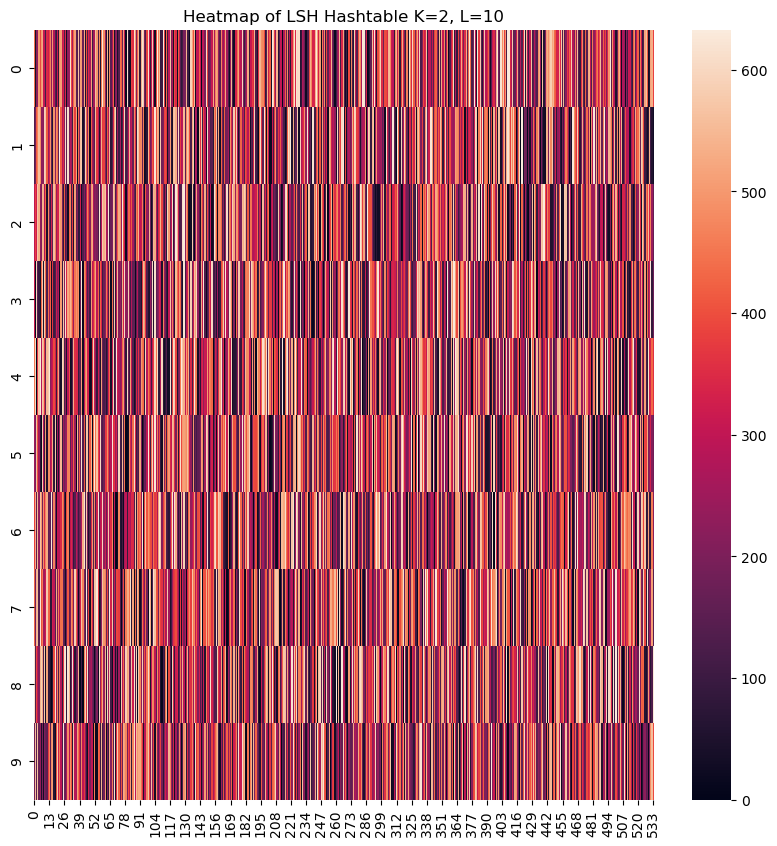

In [7]:
## construct second level hash functions based on 3d array generated from 1(b),
# generate coefficients for second level hashing (a0,a1,...)
def RandCoeffs_level2(r,p):
    # Create a list of random values.
    randList =[] 
    # the first value in randList is a0 (a0 >=0 and <p)
    randIndex_a0 = random.randint(0,p-1)
    randList.append(randIndex_a0)
    while r > 0:
        randIndex_a = random.randint(1, p-1) # coeff a1...ar >0 and < prime
        # Ensure that each random number is unique.
        while randIndex_a in randList:
            randIndex_a = random.randint(1,p-1) 
        # Add the random number to the list.
        randList.append(randIndex_a)        
        r = r - 1
    return (randList)
# function for both level locality sensitive hashing and generate LXN matrix(L is no. of bands and N is no. of Docs)
def minhash_level2(array2,ksig,band):
    signatures2 =[]
    prime = len(array2[0])+1
    m = len(array2)+100
    result = minhash_level1(array2,ksig,band) #level 1-LSH hashing signatures
    for l in range(band):
        signature =[]
        coeffa = RandCoeffs_level2(ksig,prime)
        for i in range(len(array2)): # loop over all documents            
            hashcode = coeffa[0] # a0 (kvalue =0)
            cumsum_hashcode = 0
            hashcode_sum =0
            kvalue=1
            while kvalue <= ksig: # loop over No. of hash functions(signatures)
                cumsum_hashcode += (coeffa[kvalue] * result[l,i,kvalue-1])
                kvalue = kvalue+1
                hashcode_sum = ((hashcode + cumsum_hashcode)%(prime))%m #((a0+a1x1+a2x2...)mod p)mod m 
            # Store the MinHash signature i document.
            signature.append(hashcode_sum)
        signatures2.append(signature)
    return(np.array(signatures2))

# generate hashtables of size MxL (size of bucket by number of bands)
result2 = minhash_level2(array_all,2,10)
print("dimension of level 2 LSH" ,result2.shape)
#print(result)
plt.figure(figsize=(10,10))
sns.heatmap(result2)
plt.title("Heatmap of LSH Hashtable K=2, L=10")


Part II: Nearest Neighbor Search 
(a) For each query document q in our queries dataset 𝑄, firstly, find the set of
articles Dq that collide with q in at least one hash table. Compute Jaccard similarity between q
and each article in Dq . Please report the list of top-10 articles with highest Jaccard similarity in
descending order for each query q (i.e., four lists in total). The article with the highest Jaccard
similarity is ranked at 1. Each row of the list is of the form <news_id> <Jaccard_sim>
<class_label> for one query q. [20 pts]

In [56]:
start_LSH = time.time()
# group bitvector_query (first four rows) and bitvector_all
array_compare=array_query+array_all
# do LSH for array_compare data
result_query = minhash_level2(array_compare,2,10)
#split resulting 10X538 array into Q:the first 4 columns query documents and Dq: the rest columns all documents
Q =result_query[:,0:4]
Dq = result_query[:,4:539]
# compute Jaccard similarity 
def LSH_jac(Q,Dq):
    jac_list3=[]
    for i in range(len(Q[0])):  # loop over 4 columns in query doc  
        jac_list2=[]
        for j in range(len(Dq[0])): # loop over 534 columns in all doc
            count = 0
            for row in range(len(Q)):  # loop over 10 bands
                if Q[row,i]==Dq[row,j]: # compare LSH value
                    count+=1
            jaccar = count/len(Q)       # compute jaccard similarity 
            jac_list2.append(jaccar)
        jac_list3.append(jac_list2)
    jac_LSHarray = np.array(jac_list3)
    return(jac_LSHarray)

LSHarray=LSH_jac(Q,Dq)        
print("dimension of LSH similarity table: ", LSHarray.shape)    
# return list of news_id, jaccard_sim, and class_label
D_file = pd.read_csv(r"C:\Users\ylive\OneDrive\Desktop\bitvector_all.csv",header = None,index_col = 0,delimiter ='\t')
def doclist(doc_bitvector,jacarray):
    doc_list =[]
    for i in range(len(jacarray)):
        class_label =[]
        # sort Doc ID and jaccard similarity reversely and store in a list as Dq_top10
        Dq_top10 = (np.argsort(-jacarray[i,:])[:10]+1).tolist()
        jac_list = sorted(jacarray[i,:],reverse=True)[:10]
        # get class label from original bitvector.csv file
        for j in range(10):
            docID =Dq_top10[j]
            class_label.append(doc_bitvector.loc[docID,14928])
        # print result as a dataframe
        df = pd.DataFrame(list(zip(Dq_top10,jac_list,class_label)),columns=['news_id', 'Jaccard_sim','class_label'])
        doc_list.append(df)
    return(doc_list)
# print result of top 10 jaccard similarity of LSH hash tables
for i in range(4):
    print("ID of query document ",i+531)
    print(doclist(D_file,LSHarray)[i])
end_LSH = time.time()

dimension of LSH similarity table:  (4, 534)
ID of query document  531
   news_id  Jaccard_sim    class_label
0      531          1.0  entertainment
1      432          0.1  entertainment
2      510          0.1  entertainment
3       57          0.1  entertainment
4      505          0.1           tech
5      245          0.1  entertainment
6      352          0.1  entertainment
7      188          0.1  entertainment
8      225          0.1  entertainment
9      350          0.1           tech
ID of query document  532
   news_id  Jaccard_sim    class_label
0      532          1.0  entertainment
1      495          0.1           tech
2      513          0.1           tech
3       25          0.1           tech
4      381          0.1  entertainment
5      479          0.1           tech
6       91          0.1           tech
7      456          0.1  entertainment
8      169          0.1           tech
9      198          0.1  entertainment
ID of query document  533
   news_id  Jaccard

(b) Compute Jaccard similarity for query q and all articles in the dataset. Please report the list of
top-10 articles with highest Jaccard similarity in descending order for each query q (i.e., four
lists in total). [10 pts].

In [55]:
start_bitv = time.time()
def bitvector_jac(file_query,file):
    jaccar_array2 =[]
    for row1 in range(len(file_query)): # loop over 1-4 rows in bitvector_query(no. of docs)
        jaccar_array1=[]
        for row2 in range(len(file)): # loop over all rows in bitvector_all (no. of docs)
            count = 0
            count_zero=0
            for col in range(len(file.columns)): # loop over all feature bitvector per document
                # count two comparative rows of bivector equals to 1
                if file_query.iloc[row1,col]== file.iloc[row2,col]==1:
                    count+=1
                # count two comparative rows of bivector equals to 0
                elif file_query.iloc[row1,col]== file.iloc[row2,col]==0:
                    count_zero+=1
            # count jaccard similarity of comparative rows 
            jaccar_array1.append(round(count/(len(file.columns)-count_zero),4))
        jaccar_array2.append(jaccar_array1)
    return(np.array(jaccar_array2))
# output n*4 jaccard similarity (n is no. of docs in bitvector_all) 
ground_jac = bitvector_jac(file_query,file)
print("dimension of ground_truth similarity table: ", ground_jac.shape)

# print result of top 10 jaccard similarity of bitvector comparison as ground truth
for i in range(4):
    print("ID of query document ",i+531)
    print(doclist(D_file,ground_jac)[i])
end_bitv = time.time()

dimension of ground_truth similarity table:  (4, 534)
ID of query document  531
   news_id  Jaccard_sim    class_label
0      531       1.0000  entertainment
1      145       0.1972  entertainment
2       70       0.1678  entertainment
3      314       0.1654  entertainment
4      130       0.1146  entertainment
5      412       0.0724  entertainment
6      317       0.0645  entertainment
7      503       0.0621  entertainment
8       35       0.0621  entertainment
9      321       0.0603  entertainment
ID of query document  532
   news_id  Jaccard_sim    class_label
0      532       1.0000  entertainment
1      419       0.0941  entertainment
2       42       0.0940  entertainment
3      520       0.0923  entertainment
4      524       0.0921           tech
5      251       0.0912  entertainment
6      197       0.0912  entertainment
7      221       0.0905           tech
8      501       0.0905           tech
9      125       0.0892           tech
ID of query document  533
   news_id

(c) Compare the query time in Part II(a) and Part II(b) per query in milliseconds and comment on
their differences if any. [5 pts]

In [54]:
# time of computation in milliseconds
print("timespan for LSH jaccard similarity comparison: ", round(end_LSH - start_LSH,3)*1000,"ms")
print("timespan for bitvector jaccard similarity comparison: ", round(end_bitv - start_bitv,3)*1000,"ms")

timespan for LSH jaccard similarity comparison:  12776.0 ms
timespan for bitvector jaccard similarity comparison:  3334347.0 ms


Part III: Search Quality Evaluation [25 pts]

(a) Investigate the impact of the hash size (k). Given l=10, for each value of hash size k
compute the F1-score for each query q (𝐹1 ) using the reported result from query q in Part II(a)
𝑞
as search results and Part II(b) as ground-truth. Take the average of F1-score across all queries
at k. Please report:
1. the F1-score plot with a varying k=[2,4,8]. 
2. the average query time in milliseconds with a varying k=[2,4,8]. [20 pts]

In [64]:
# compute Jaccard similarity by locality senstive hashing when k = 2,4,8 & compute F1-scores
Fscorelist=[]
for kvalue in range(3):    
    time_start = time.time()
  # group bitvector_query (first four rows) and bitvector_all    
    array_compare=array_query+array_all
    # do LSH for array_compare data
    result_query = minhash_level2(array_compare,2**(kvalue+1),10) # LSH for k = 2,4,8 and L=10
    #jaccard similarity computation for first 4 columns against all rest of columnns in hash tables
    Q =result_query[:,0:4]
    Dq = result_query[:,4:539]
    LSH_result =LSH_jac(Q,Dq)
    # get top 10 articles jaccard similarity and convert them into 1 if similarity >=0.8, otherwise 0, compute F1 scores.
    Fscore=0
    TP=0
    FN=0
    FP=0
    for i in range(4): 
        y_LSH = (np.argsort(-LSH_result[i,:])[:10]+1).tolist()# LSH top 10 documents list
        y_act = (np.argsort(-ground_jac[i,:])[:10]+1).tolist()# real top10 doc list
        TP += len(set(y_LSH).intersection(y_act)) # calculate F score based on class labels
        FN += len(set(y_act)-set(y_LSH))
        FP += len(set(y_LSH)-set(y_act))
    Fscore = TP / (TP + 0.5*(FP+FN))
    time_finish = time.time()
    time_diff = round(time_finish - time_start, 3)
    print("timespan for k=", 2**(kvalue+1), "is", time_diff*1000,"ms")    
    print("Average F1-score is: ",Fscore, "Average TP: ",TP/4, "Average FN: ", FN/4, "Average FP: ", FP/4
    Fscorelist.append(Fscore)

timespan for k= 2 is 9917.0 ms
Average F1-score is:  0.225 Average TP:  2.25 Average FN:  7.75 Average FP:  7.75
timespan for k= 4 is 19976.0 ms
Average F1-score is:  0.1 Average TP:  1.0 Average FN:  9.0 Average FP:  9.0
timespan for k= 8 is 40212.0 ms
Average F1-score is:  0.15 Average TP:  1.5 Average FN:  8.5 Average FP:  8.5


[Text(0.5, 0, 'K value'), Text(0, 0.5, 'F1-score')]

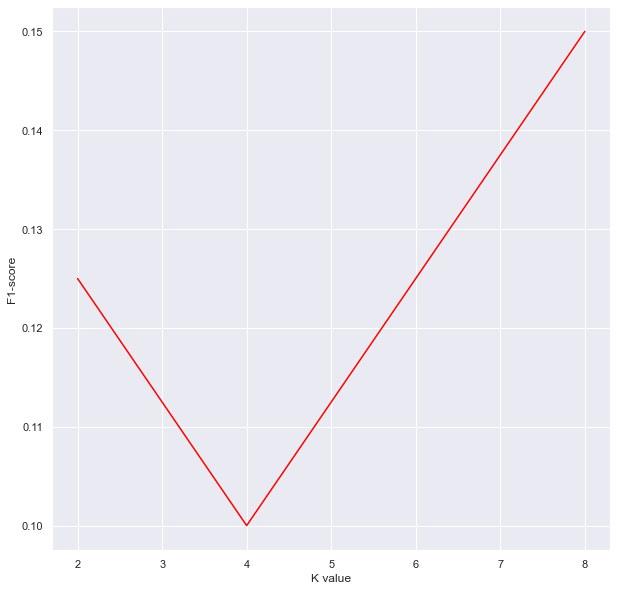

In [63]:
# plot F1-scores with varying K =2,4,8
sns.regplot(x=x, y=y)
x=[2,4,8]
y=[0.125,0.1,0.15]
plt.clf()
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.lineplot(x=x,y=y,color="red")
ax.set(xlabel='K value', ylabel='F1-score')


(b) Explain what you have observed from Part III(a) and suggest how you would tune the
number of hash size (k) in terms of higher F1-score and lesser query time, respectively? 

Because except the 100% match of similarity, the rest of similarities are way below threshold 0.8. We do not see obvious difference of different k impact on F-score performance. When k increases, the computational time increases dramatically. According to the performance curve (s vs. 1-(1-s^r)^b), increasing b value would decrease false negative values (FN) and increase false positive values (FP). Reversely increasing r value would cause FN increasing and FP decreasing. It really depends on the application in order to find the optimum turning parameters r and b. For example in some medical applications, because early medical intervention is crucial to some diseases, setting low threshold and minimizing FN would be prioritized. In this case we would choose increasing b and decreasing r values.